In [11]:
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread("dsf.png")

plt.imshow(src)

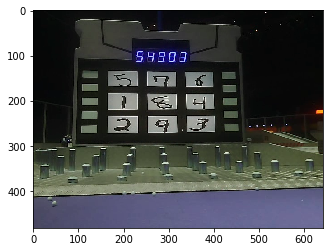

In [12]:
plt.show()

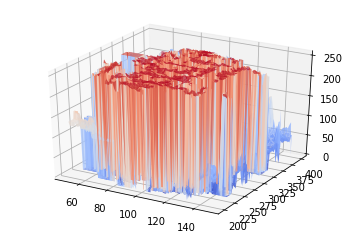

In [3]:
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV_FULL)
hsvSplit = cv2.split(hsv)

x_start = 200
x_end = 400
y_start = 50
y_end = 150
x,y=np.mgrid[y_start:y_end:1,x_start:x_end:1]

show = hsvSplit[0][y_start:y_end, x_start:x_end]

ax=plt.subplot(111,projection='3d')
ax.plot_surface(x,y,show,rstride=2,cstride=2,cmap=plt.cm.coolwarm,alpha=0.8)
plt.show()

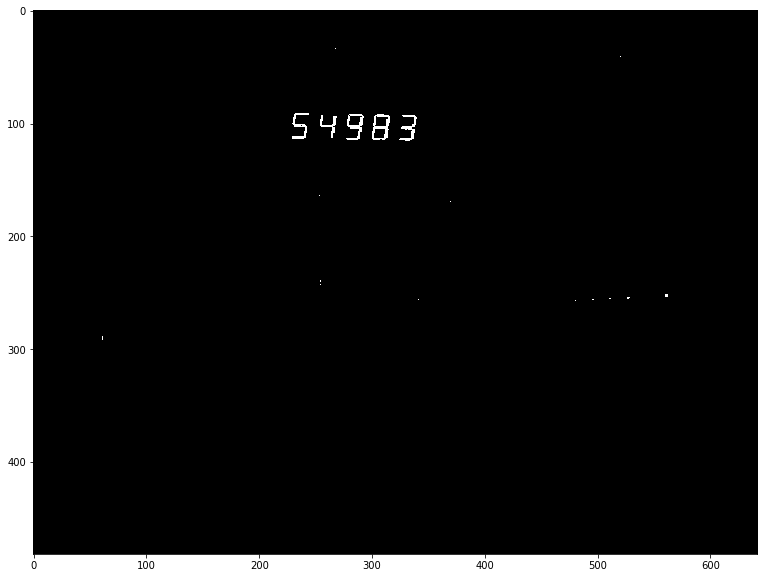

In [13]:
red_high = cv2.threshold(hsvSplit[0], 220, 255, cv2.THRESH_BINARY)[1]
red_low = cv2.threshold(hsvSplit[0], 20, 255, cv2.THRESH_BINARY_INV)[1]

red = cv2.bitwise_or(red_high, red_low)

v_high = cv2.threshold(hsvSplit[2], 230, 255, cv2.THRESH_BINARY)[1]
red = cv2.bitwise_and(red, v_high)

s_high = cv2.threshold(hsvSplit[1], 180, 255, cv2.THRESH_BINARY_INV)[1]
red = cv2.bitwise_and(red, s_high)

fig = plt.figure(figsize = (15, 10))
plt.imshow(red, cmap = "gray")
plt.show()

In [7]:
contours = cv2.findContours(red.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

digit = []
for contour in contours[0]:
    if(cv2.contourArea(contour) < 10):
        continue;
    digit.append(cv2.boundingRect(contour))
    
digit


digit_sorted = sorted(digit, key = lambda digit: digit[0])
digit_sorted

digit_sorted[0][0]

roi = []
for rect in digit_sorted:
    roi.append(red[int(rect[1]):int(rect[1] + rect[3]),
                   int(rect[0]):int(rect[0] + rect[2])])

plt.figure(figsize=(12, 10))
plt.imshow(roi[0], cmap = "gray")
plt.show()

error: /tmp/binarydeb/ros-lunar-opencv3-3.3.1/modules/imgproc/src/shapedescr.cpp:319: error: (-215) npoints >= 0 && (depth == 5 || depth == 4) in function contourArea


In [15]:
contours = cv2.findContours(red.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours[0][1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [6]:
for number in roi:
    print "roi‘s shape is ",number.shape

roi‘s shape is  (23, 15)
roi‘s shape is  (20, 15)
roi‘s shape is  (23, 16)
roi‘s shape is  (23, 16)
roi‘s shape is  (23, 16)


In [7]:
#该函数判断该区域是否为白，白的话返回true,否则返回false.把二维数组变成一维，再累计区域里面255的点的个数，个数大于等于10则判定该区域为白，
#为了程序的快速性，个数累计至10即可停止循环
def isWhite(region):
    j = 0
    n = region.size
    regions = np.reshape(region,n)
    judge_region = regions.tolist()
    for i in judge_region:
        if (i == 255):
            j = j + 1
            if j == 10:
                return True
    else:
        return False

In [8]:
#按LED灯的数字显示规律，把数字分为7个区域，为了程序的快速性，实际用5个区域即可分辨9个数字，故备注掉两个区域
for number in roi:
    height, width = number.shape
    up = number[0:height/7, 2*width/7:5*width/7]
    #middle = number[3*height/7:4*height/7,2*width/7:5*width/7]
    bottom = number[6*height/7:height,2*width/7:5*width/7]
    left_up = number[1*height/7:3*height/7,0:2*width/7]
    right_up = number[1*height/7:3*height/7,5*width/7:width]
    left_bottom = number[4*height/7:6*height/7,0:2*width/7]
    #right_bottom = number[4*height/7:6*height/7,5*width/7:width]
    is_up = isWhite(up)
    is_bottom = isWhite(bottom)
    is_left_up = isWhite(left_up)
    is_right_up = isWhite(right_up)
    is_left_bottom = isWhite(left_bottom)
    #is_right_bottom = isWhite(right_bottom)
    if (not is_up):
        if is_left_up:
            print "4"
        else:
            print "1"
    elif (is_up and not is_bottom):
            print "7"
    elif (is_up and is_bottom and not is_right_up):
        if is_left_bottom:
            print "6"
        else:
            print "5"
    elif (is_up and is_bottom and is_right_up):
        if is_left_up:
            if is_left_bottom:
                print "8"
            else:
                print "9"
        else:
            if is_left_bottom:
                print "2"
            else:
                print "3"

5
4
9
8
3
